# P03_05_Multivar_LSTM

In [327]:
section_fig_main_title = 'P03_05_Multivar_LSTM_'

In [328]:
!which python

/Users/amin/miniconda3/bin/python


In [329]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

from tensorflow import keras

In [330]:
from sklearn.metrics import r2_score
from math import sqrt
import json

In [331]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install xgboost

In [332]:
from sklearn.metrics import r2_score,mean_absolute_error

In [333]:
# !/Users/amin/anaconda3/bin/python -m pip install --upgrade tensorflow 
# pip install --upgrade tensorflow 

In [334]:

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [335]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [337]:
from pandas.plotting import autocorrelation_plot
import gif

In [338]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [339]:
import tensorflow as tf
tf.__version__


'2.6.0'

In [340]:
import gif
from tqdm import tqdm

In [341]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data 

Using the univariate evenly spaced time series data from P03_01.

In [355]:
csv_path = "../Data/Data_ICME_Edited_Decoded_out_P02_03.csv"

df = pd.read_csv(csv_path)

In [356]:
# df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']

In [361]:
df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])


df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']
df = df.drop(columns=['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df = df.drop(columns=['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [362]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,1,2,1,370,400,9,3,117,1.375000
1996-07-01 18:00:00,1,4,44,360,370,11,3,78,0.583333
1996-08-07 12:00:00,1,2,2,350,380,7,3,88,0.791667
1996-12-23 17:00:00,1,2,22,360,420,10,3,69,1.625000
1997-01-10 04:00:00,3,1,4,450,460,14,3,191,0.791667


<AxesSubplot:xlabel='ICME Plasma/Field Start Y/M/D (UT) (b)'>

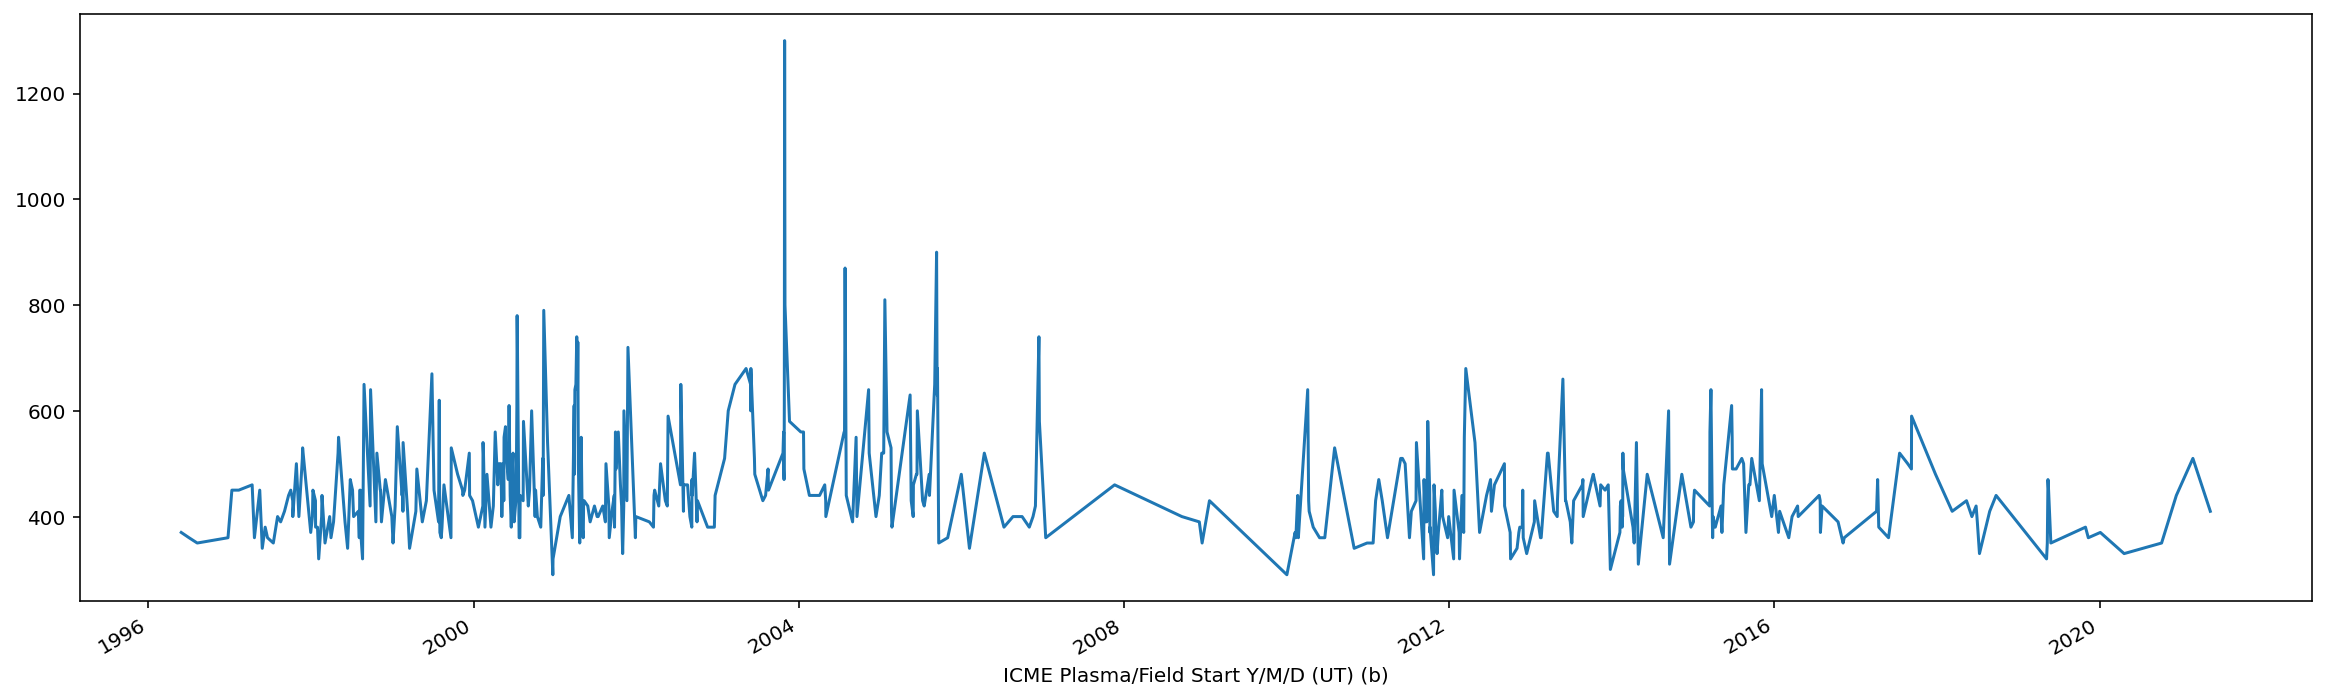

In [363]:
df['V_ICME (km/s) (i)'].plot(figsize=(20,6))

<AxesSubplot:xlabel='ICME Plasma/Field Start Y/M/D (UT) (b)'>

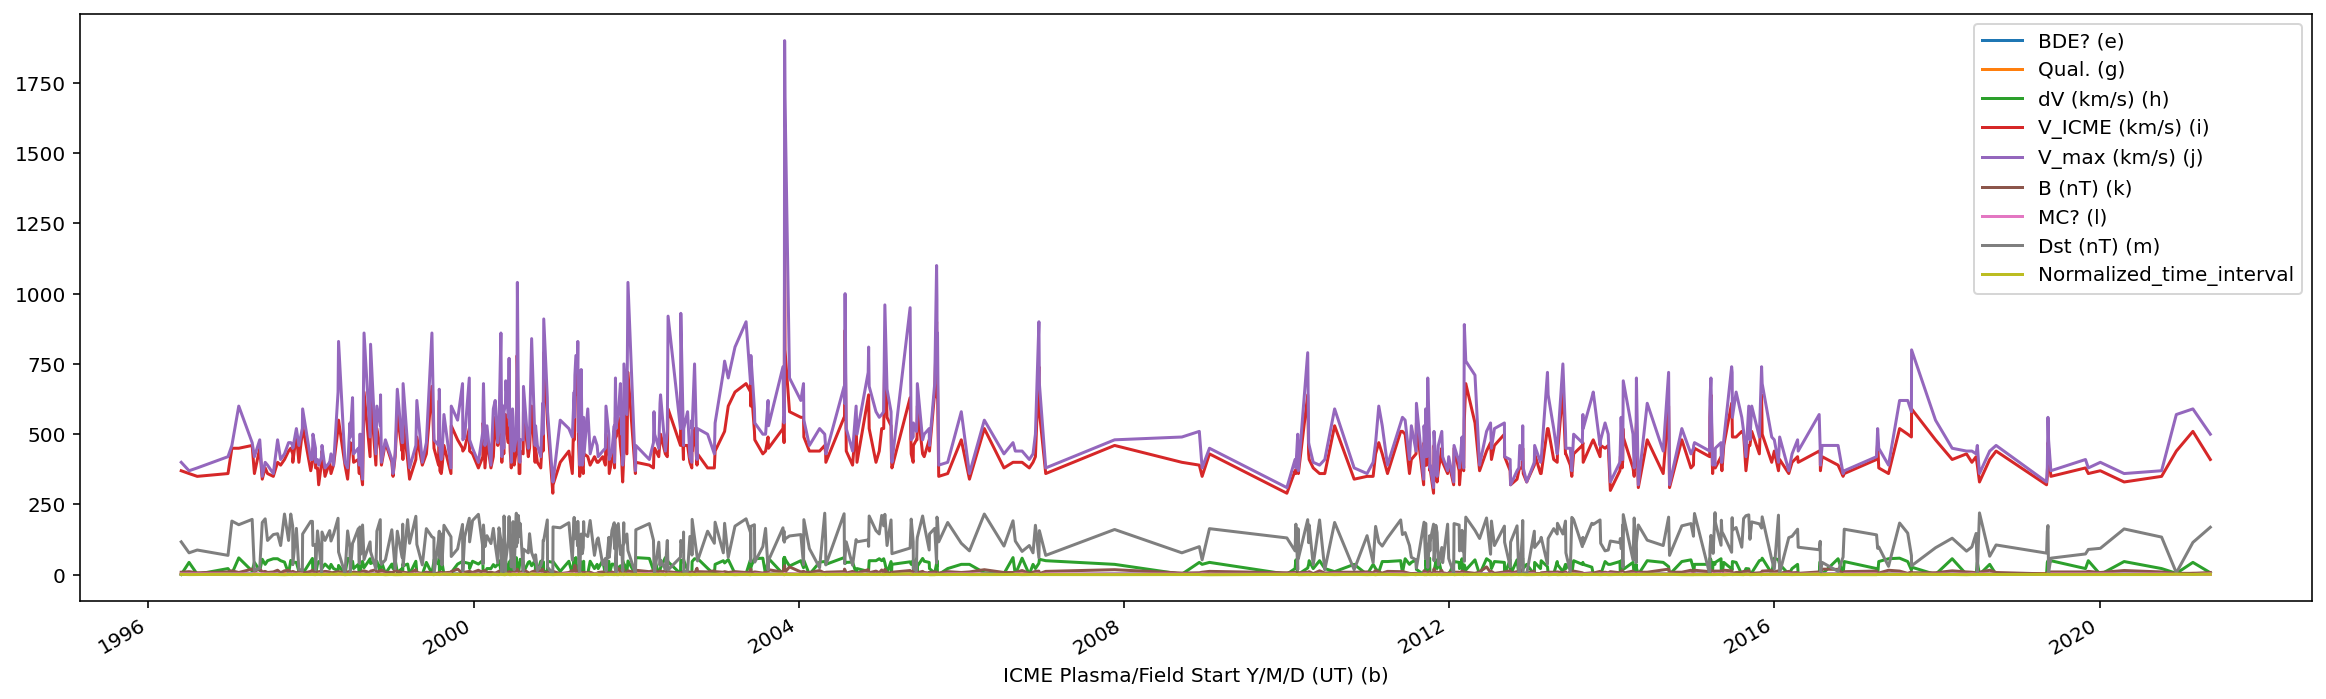

In [364]:
df.plot(figsize=(20,6))

In [365]:
df.columns

Index(['BDE? (e)', 'Qual. (g)', 'dV (km/s) (h)', 'V_ICME (km/s) (i)',
       'V_max (km/s) (j)', 'B (nT) (k)', 'MC? (l)', 'Dst (nT) (m)',
       'Normalized_time_interval'],
      dtype='object')

In [367]:
keep_cols = ['BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval']
df = df[keep_cols]
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-05-27 15:00:00,1,2,1,370,9,3,117,1.375000
1996-07-01 18:00:00,1,4,44,360,11,3,78,0.583333
1996-08-07 12:00:00,1,2,2,350,7,3,88,0.791667
1996-12-23 17:00:00,1,2,22,360,10,3,69,1.625000
1997-01-10 04:00:00,3,1,4,450,14,3,191,0.791667


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 1996-05-27 15:00:00 to 2021-05-12 15:00:00
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BDE? (e)                  493 non-null    int64  
 1   Qual. (g)                 493 non-null    int64  
 2   dV (km/s) (h)             493 non-null    int64  
 3   V_ICME (km/s) (i)         493 non-null    int64  
 4   B (nT) (k)                493 non-null    int64  
 5   MC? (l)                   493 non-null    int64  
 6   Dst (nT) (m)              493 non-null    int64  
 7   Normalized_time_interval  493 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 34.7 KB


## Split the data

In [369]:
split_fraction = 0.69
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 5
future = 1
learning_rate = 0.001
batch_size = 256
epochs = 10

def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [144]:
selected_features = ['BDE? (e)', 'Qual. (g)',
                   'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'B (nT) (k)',
                   'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval']

features = df[selected_features]
features.index = df.index

In [145]:
features.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-05-27 15:00:00,1,2,1,370,9,3,117,1.375000
1996-07-01 18:00:00,1,4,44,360,11,3,78,0.583333
1996-08-07 12:00:00,1,2,2,350,7,3,88,0.791667
1996-12-23 17:00:00,1,2,22,360,10,3,69,1.625000
1997-01-10 04:00:00,3,1,4,450,14,3,191,0.791667


In [146]:
features.shape

(493, 8)

In [147]:
df.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)', 'BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'B (nT) (k)', 'MC? (l)',
       'Dst (nT) (m)', 'Normalized_time_interval'],
      dtype='object')

## Make Data Evenly spaced

In [373]:
df_transformed_18D = df.resample('18D').pad()

<AxesSubplot:xlabel='ICME Plasma/Field Start Y/M/D (UT) (b)'>

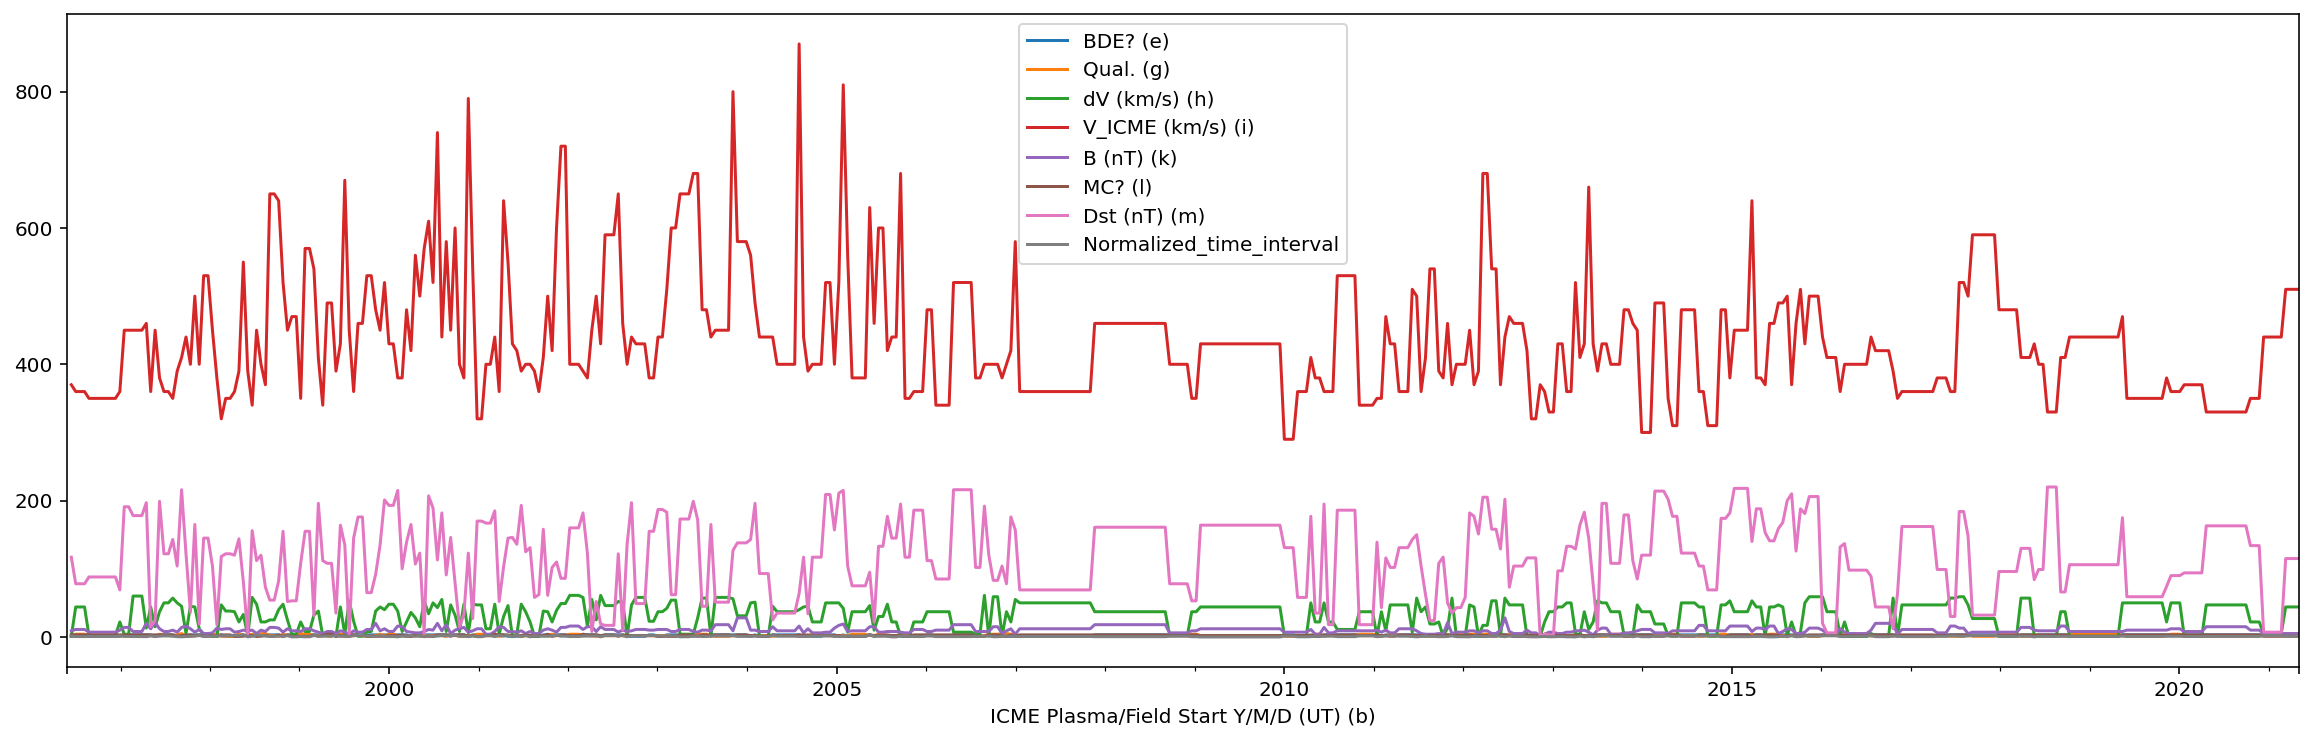

In [374]:
df_transformed_18D.plot(figsize=(20,6))

## Cutting off the time interval between 2007 to 2010

<Figure size 1440x576 with 0 Axes>

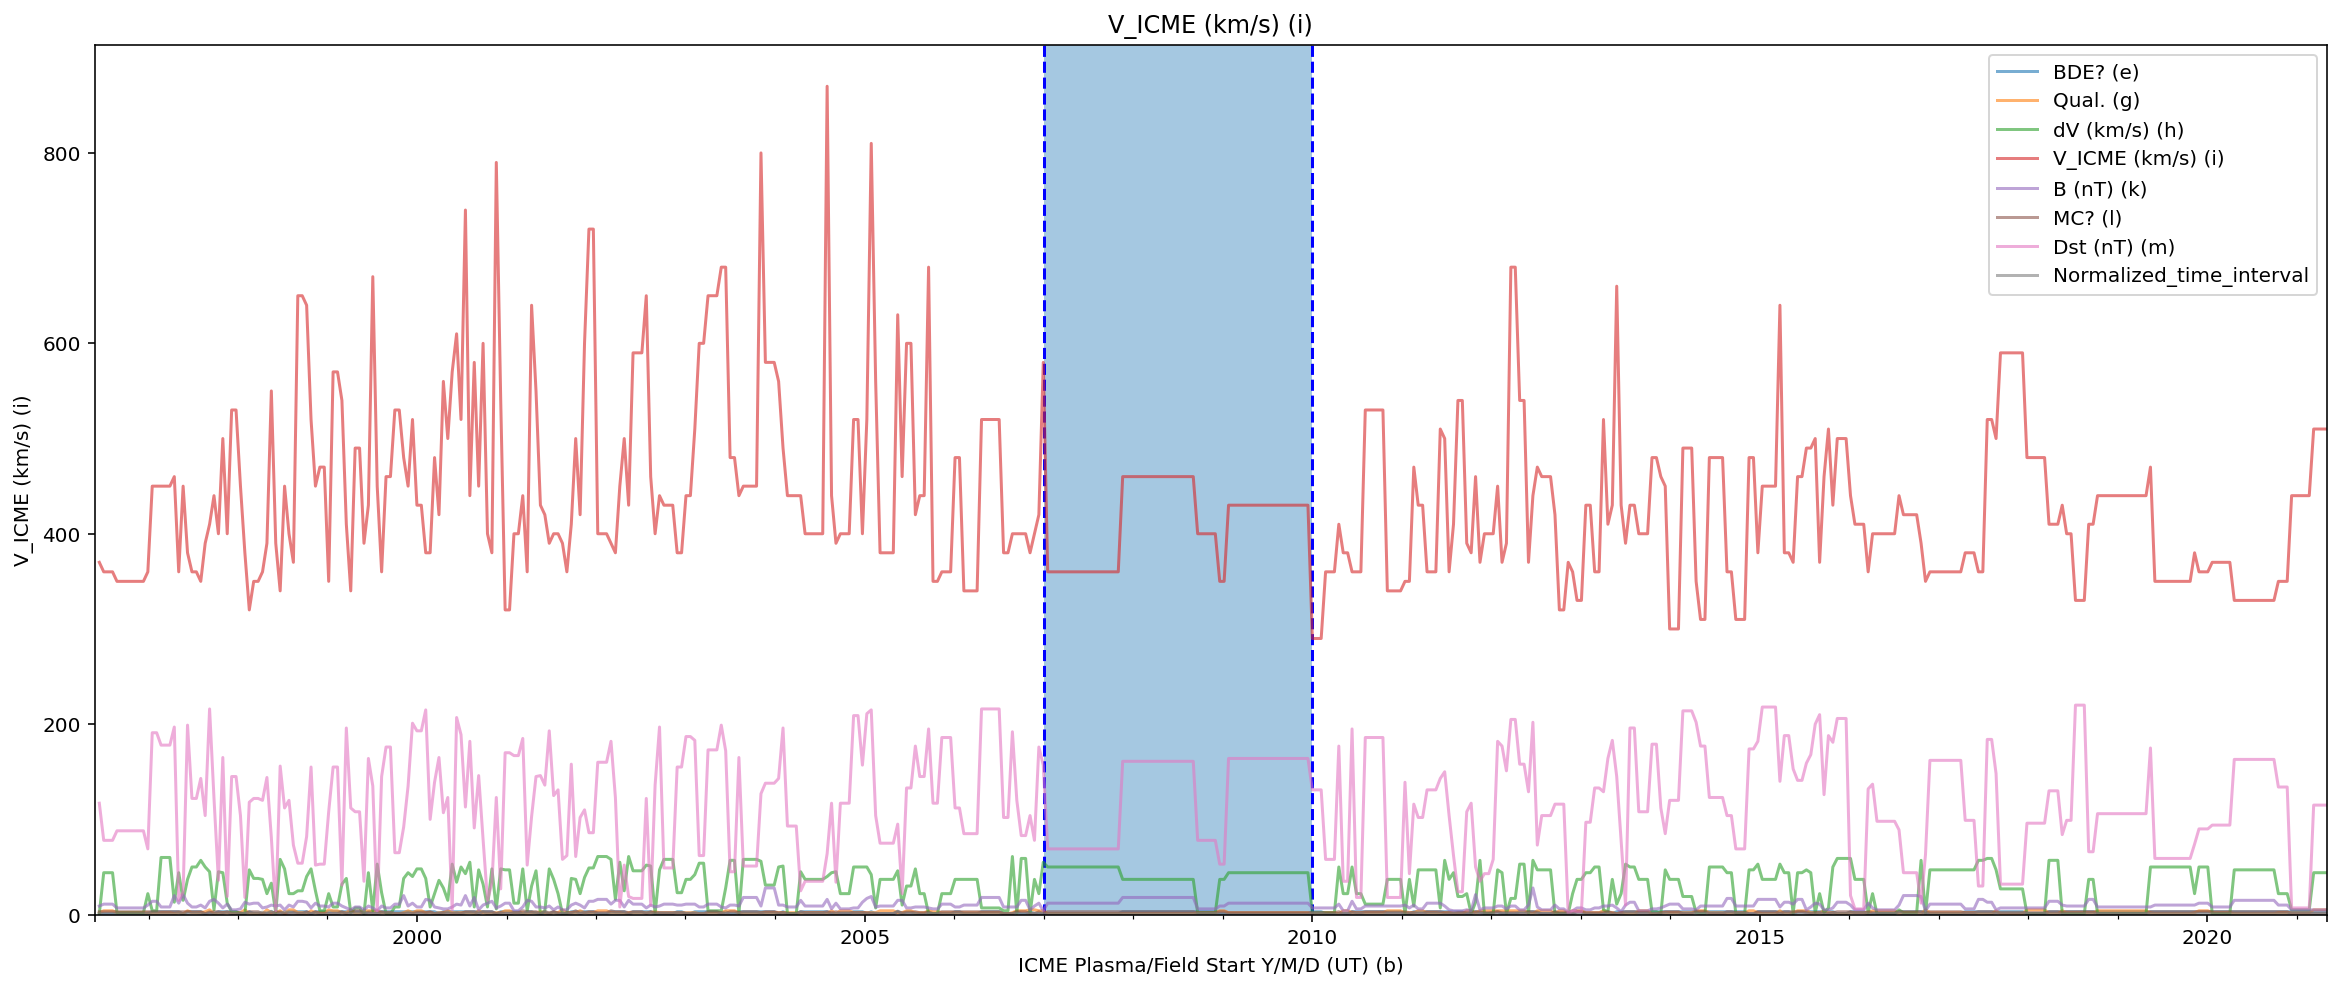

In [381]:
plt.figure(figsize=(20,8))
df_transformed_18D.plot(alpha=0.6, figsize=(20,8))


plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.ylim(0,)


plt.vlines('2007', 0, 1400, colors='b', linestyles='--')
plt.vlines('2010', 0, 1400, colors='b', linestyles='--')



# time_interval_diff_norm2 = 50*time_interval_diff_norm
# time_interval_diff_norm2.plot()


x = ['2007', '2007', '2010', '2010']
y = [0, 1400, 1400, 0]

plt.fill_between(x, y, alpha=0.4)


plt.savefig("../Figures/" + section_fig_main_title +"df_transformed_18D.png")

plt.show()

In [469]:
mask_less_2007 = df_transformed_18D[df_transformed_18D.index < '2007']
mask_greater_2010 = df_transformed_18D[df_transformed_18D.index > '2010']
mask_less_2016 = df_transformed_18D[df_transformed_18D.index < '2016']

In [468]:
frames = [mask_less_2007, mask_greater_2010, mask_less_2016]

In [461]:
df_transformed_18D_cutOff = pd.concat(frames)
df_transformed_18D_cutOff = df_transformed_18D_cutOff[1:]
df_transformed_18D_cutOff.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-06-14,1.0,2.0,1.0,370.0,9.0,3.0,117.0,1.375000
1996-07-02,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-07-20,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-07,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-25,1.0,2.0,2.0,350.0,7.0,3.0,88.0,0.791667


<AxesSubplot:xlabel='ICME Plasma/Field Start Y/M/D (UT) (b)'>

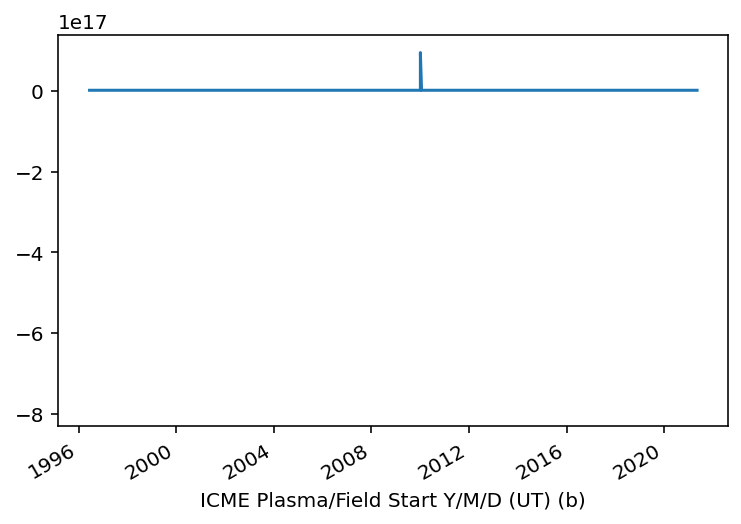

In [462]:
time_interval_diff = df_transformed_18D_cutOff.index.to_series().diff()
time_interval_diff.plot()

In [463]:
# rm index
df_transformed_18D_cutOff.reset_index(drop=True, inplace=True)

In [464]:
# rm first row
df_transformed_18D_cutOff = df_transformed_18D_cutOff[1:]

In [465]:
df_transformed_18D_cutOff.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
1,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
2,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
3,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
4,1.0,2.0,2.0,350.0,7.0,3.0,88.0,0.791667
5,1.0,2.0,2.0,350.0,7.0,3.0,88.0,0.791667


<AxesSubplot:>

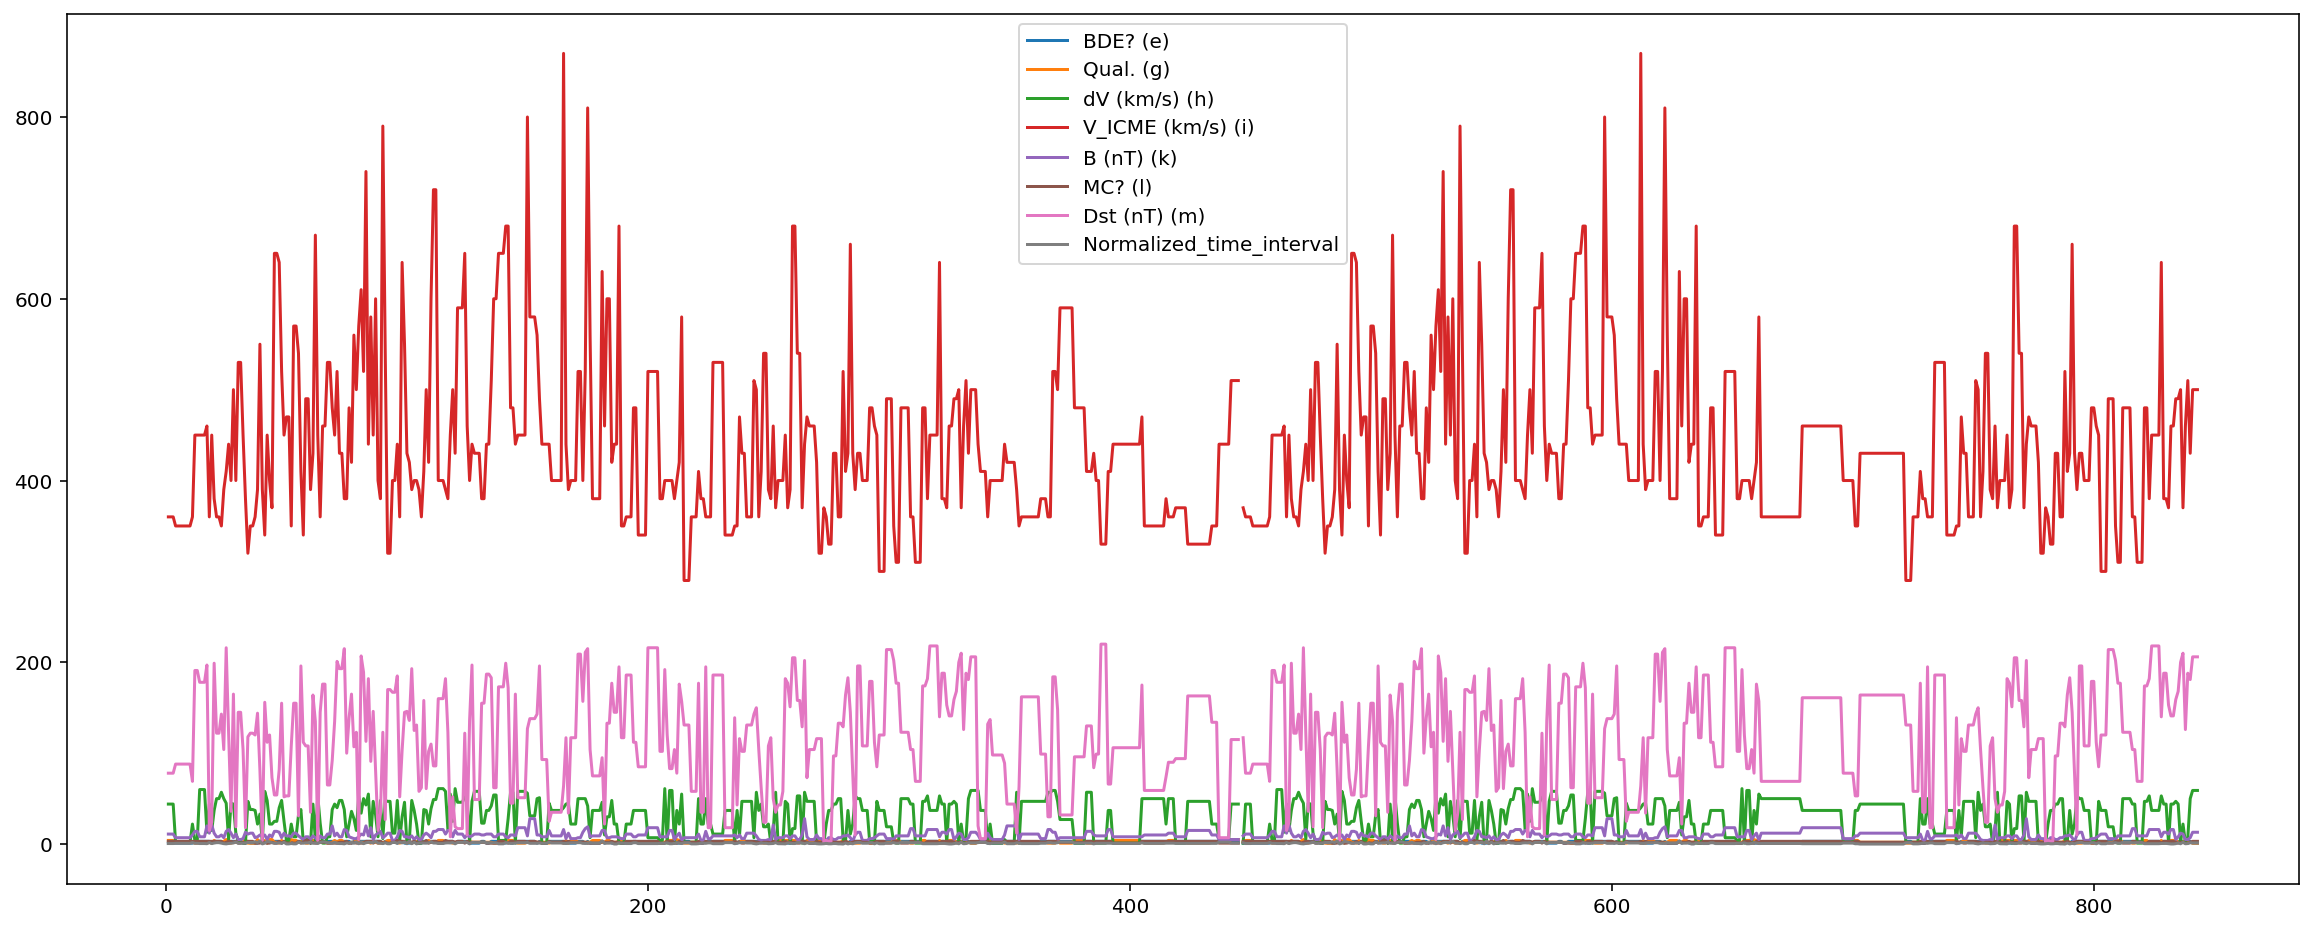

In [466]:
df_transformed_18D_cutOff.plot(figsize=(20,8))

<AxesSubplot:>

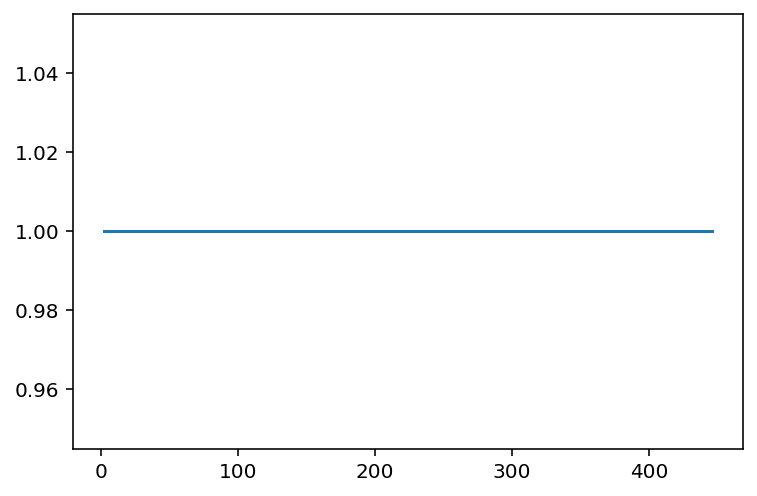

In [444]:
time_interval_diff = df_transformed_18D_cutOff.index.to_series().diff()
time_interval_diff.plot()

In [448]:
df_transformed_18D_cutOff.index.to_series()

1        1
2        2
3        3
4        4
5        5
      ... 
442    442
443    443
444    444
445    445
446    446
Length: 446, dtype: int64

In [148]:
# titles = ['BDE? (e)', 'Qual. (g)', 'dV (km/s) (h)', 'V_ICME (km/s) (i)',
#        'B (nT) (k)', 'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval']

# feature_keys = ['BDE? (e)', 'Qual. (g)', 'dV (km/s) (h)', 'V_ICME (km/s) (i)',
#        'B (nT) (k)', 'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval']

# colors = [
#     "blue",
#     "orange",
#     "green",
#     "red",
#     "purple",
#     "brown",
#     "pink",
#     "gray",
# ]

# date_time_key = "ICME Plasma/Field Start Y/M/D (UT) (b)"


# def show_raw_visualization(data):
#     time_data = data[date_time_key]
#     fig, axes = plt.subplots(
#         nrows=4, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
#     )
#     for i in range(len(feature_keys)):
#         key = feature_keys[i]
#         c = colors[i % (len(colors))]
#         t_data = data[key]
#         t_data.index = time_data
#         t_data.head()
#         ax = t_data.plot(
#             ax=axes[i // 2, i % 2],
#             color=c,
#             title="{} - {}".format(titles[i], key),
#             rot=25,
#         )
#         ax.legend([titles[i]])
#     plt.tight_layout()


# show_raw_visualization(df)

## Normalizing data

In [370]:
features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6,7
0,-1.398798,-0.389291,-1.507188,-0.862626,-0.214904,1.060704,0.043285,0.499631
1,-1.398798,1.275601,0.664612,-0.952263,0.238930,1.060704,-0.605988,-0.717190
2,-1.398798,-0.389291,-1.456681,-1.041900,-0.668738,1.060704,-0.439508,-0.396974
3,-1.398798,-0.389291,-0.446541,-0.952263,0.012013,1.060704,-0.755820,0.883890
4,0.724378,-1.221737,-1.355667,-0.145529,0.919682,1.060704,1.275238,-0.396974


In [371]:
features.shape

(493, 8)

## Train and Val

In [372]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [157]:
train_data.shape

(340, 8)

In [158]:
val_data.shape

(153, 8)

In [159]:
train_data.head()

,0,1,2,3,4,5,6,7
0,-1.398798,-0.389291,-1.507188,-0.862626,-0.214904,1.060704,0.043285,0.499631
1,-1.398798,1.275601,0.664612,-0.952263,0.238930,1.060704,-0.605988,-0.717190
2,-1.398798,-0.389291,-1.456681,-1.041900,-0.668738,1.060704,-0.439508,-0.396974
3,-1.398798,-0.389291,-0.446541,-0.952263,0.012013,1.060704,-0.755820,0.883890
4,0.724378,-1.221737,-1.355667,-0.145529,0.919682,1.060704,1.275238,-0.396974


In [160]:
start = past + future
end = start + train_split
print('start = ', start)
print('end = ', end)
print('train_split = ', train_split)
sequence_length = int(past / step)
print('sequence_length = ', sequence_length)

start =  6
end =  346
train_split =  340
sequence_length =  5


## Choose target column

In [161]:
# features.iloc[start:end][[3]]

In [162]:
x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[3]]

In [163]:
# y_train.plot()

In [164]:
# len(x_train)

In [165]:
print('x_train.shape', x_train.shape,
      '\ny_train.shape', y_train.shape)

x_train.shape (340, 7) 
y_train.shape (340, 1)


## Preprocessing data

In [166]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(x_train,
                                                                  y_train,
                                                                  sequence_length=sequence_length,
                                                                  sampling_rate=step,
                                                                  batch_size=batch_size,
                                                                  )

In [167]:
x_end = len(val_data) - past - future
# print('x_end ', x_end)
label_start = train_split + past + future
# print('label_start ', label_start)

In [168]:
x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[3]]

In [173]:
# y_val.plot()

In [189]:
256+80+6

342

In [192]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(x_val,
                                                                y_val,
                                                                sequence_length=sequence_length,
                                                                sampling_rate=step,
                                                                batch_size=batch_size,
                                                                )

for i in range(1,3):
    
    for batch in dataset_train.take(i):
        inputs, targets = batch

    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)

Input shape: (256, 5, 7)
Target shape: (256, 1)
Input shape: (80, 5, 7)
Target shape: (80, 1)


In [195]:
for i in range(1,2):
    for batch in dataset_val.take(i):
        inputs, targets = batch

    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)

Input shape: (143, 5, 7)
Target shape: (143, 1)


In [81]:
shape=(inputs.shape[1], inputs.shape[2])
shape

(5, 7)

## Assemble keras model

In [82]:
from tensorflow.keras import layers

In [83]:
# # https://keras.io/guides/working_with_rnns/
# model = keras.Sequential()
# model.add(layers.Embedding(input_dim=60, output_dim=7))

# # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
# model.add(layers.GRU(256, return_sequences=True))

# # The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
# model.add(layers.SimpleRNN(128))

# model.add(layers.Dense(1))

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
#               loss="mse")

# model.summary()

In [ ]:
##### inputs = keras.layers.Input(shape=(inputs.shape[1], 
#                                    inputs.shape[2]))

lstm_out = keras.layers.LSTM(64, return_sequences=True)(inputs)

outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
#               loss="mse"
              loss=tf.losses.MeanSquaredError(),
              metrics=[tf.metrics.MeanAbsoluteError()])

model.summary()

## Fit the model

In [259]:
path_checkpoint = "../Models/LSTM_Multivariate_P03_05.h5"
# es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", 
#                                             min_delta=0, 
#                                             patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
                                                    monitor="val_loss",
                                                    filepath=path_checkpoint,
                                                    verbose=1,
                                                    #save_weights_only=True,
                                                    save_best_only=True,
                                                )

history = model.fit(
                    dataset_train,
                    epochs=50,
                    validation_data=dataset_val,
                    shuffle=False,
                    callbacks=[modelckpt_callback],#es_callback, 
                )

Epoch 1/50
2/2 [==============================] - 2s 391ms/step - loss: 1.0062 - mean_absolute_error: 0.7217 - val_loss: 0.5384 - val_mean_absolute_error: 0.6133

Epoch 00001: val_loss improved from inf to 0.53836, saving model to ../Models/LSTM_Multivariate_P03_05.h5
Epoch 2/50
2/2 [==============================] - 0s 79ms/step - loss: 0.9958 - mean_absolute_error: 0.7183 - val_loss: 0.5322 - val_mean_absolute_error: 0.6078

Epoch 00002: val_loss improved from 0.53836 to 0.53220, saving model to ../Models/LSTM_Multivariate_P03_05.h5
Epoch 3/50
2/2 [==============================] - 0s 86ms/step - loss: 0.9892 - mean_absolute_error: 0.7143 - val_loss: 0.5272 - val_mean_absolute_error: 0.6030

Epoch 00003: val_loss improved from 0.53220 to 0.52724, saving model to ../Models/LSTM_Multivariate_P03_05.h5
Epoch 4/50
2/2 [==============================] - 0s 80ms/step - loss: 0.9845 - mean_absolute_error: 0.7112 - val_loss: 0.5237 - val_mean_absolute_error: 0.5990

Epoch 00004: val_loss imp

In [257]:
# history.history

## Load the pre-trained model

In [260]:
def visualize_mean_absolute_error(history, title):
    mean_absolute_error = history.history["mean_absolute_error"]
    val_mean_absolute_error = history.history["val_mean_absolute_error"]
    epochs = range(len(mean_absolute_error))
    plt.figure()
    plt.plot(epochs, mean_absolute_error, "b", label="Training mean_absolute_error loss")
    plt.plot(epochs, val_mean_absolute_error, "r", label="val_mean_absolute_error loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("mean_absolute_error")
    plt.legend()
    plt.ylim(0,)
    plt.show()




def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.ylim(0,)
    plt.show()

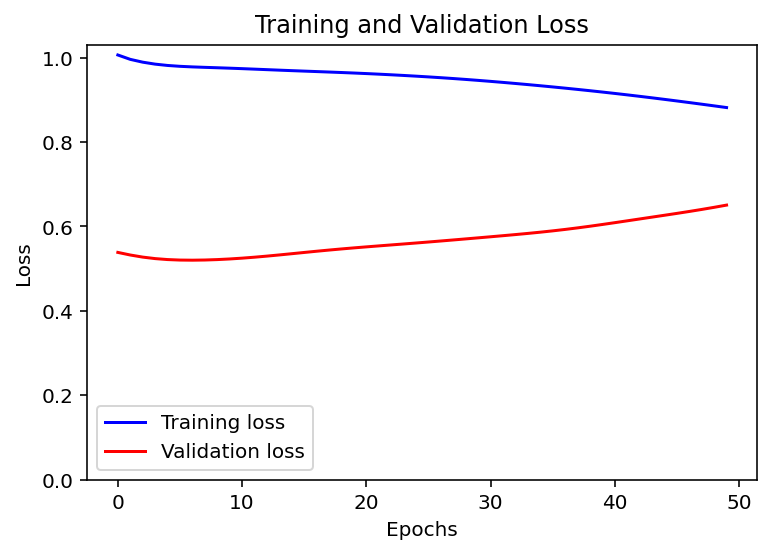

In [261]:
from tensorflow.keras.models import *

path_1 = '../Models/LSTM_Multivariate_P03_05.h5'
model = keras.models.load_model(path_1)

visualize_loss(history, "Training and Validation Loss")

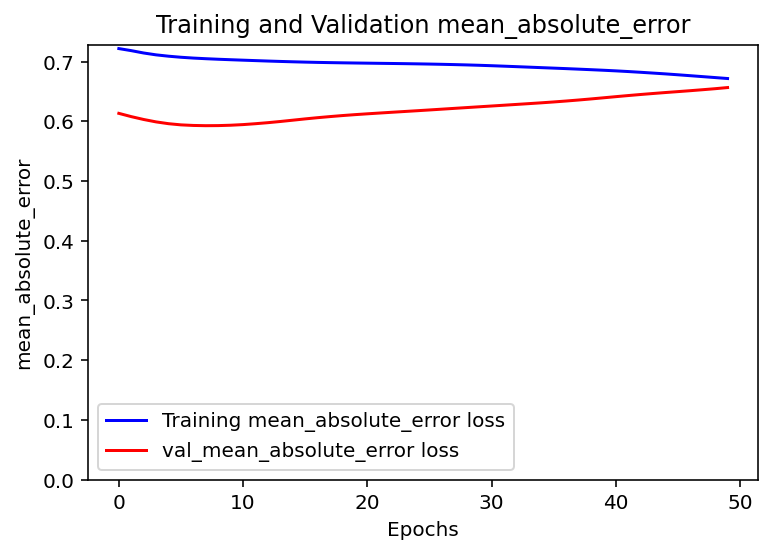

In [262]:
visualize_mean_absolute_error(history, "Training and Validation mean_absolute_error")

In [230]:
def show_plot(plot_data, delta, title):
    plt.figure(figsize=(20,8))
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
            
            
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
#     plt.show()
    
    return

## GIF

(143, 5, 7)
(143, 1)
0
tf.Tensor(
[[-1.39879842  1.27560134  0.31106357 -0.50407724 -0.89565522 -1.17929164
  -0.10654732]
 [ 0.72437776  1.27560134  1.11917522 -0.77298874 -0.89565522 -0.05929399
   1.02551796]
 [-1.39879842 -0.389291   -0.44654111 -1.22117458  0.01201326  1.06070365
   0.59266947]
 [ 0.72437776  1.27560134  1.32120314 -0.86262591 -1.12257234 -0.05929399
  -1.32185269]
 [ 0.72437776  1.27560134 -1.4061737  -0.14552858  1.14659886  1.06070365
  -0.28967553]], shape=(5, 7), dtype=float64)
tf.Tensor([-0.50407724 -0.77298874 -1.22117458 -0.86262591 -0.14552858], shape=(5,), dtype=float64)
tf.Tensor([-0.95226308], shape=(1,), dtype=float64)
[[-0.10744246]
 [-0.11075587]
 [-0.19363205]
 [-0.22824743]
 [-0.19582132]]


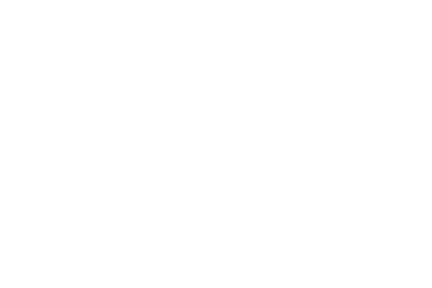

In [299]:
real_values = []
predited_values = []

@gif.frame
def plott(i):
#     real_values = []
#     predited_values = []

    for x, y in dataset_val.take(1):
        
        print(x.shape)
        print(y.shape)
        print(10*'=======')
        
        for i in range(0,1):
            
            print(i)
            print(10*'=======')
            print(x[i])
            print(10*'=======')
            print(x[i][:, 3])
            print(10*'=======')
            print(y[i])
            print(10*'=======')
            print(model.predict(x)[i])
            
            
#             show_plot([x[i][:, 3].numpy(), 
#                        y[i].numpy(), 
#                        model.predict(x)[i]],

#                       1, "Single Step Prediction")

            real_values.append(y[i].numpy())
            predited_values.append(model.predict(x)[i])
            
plott(1)       

In [296]:
real_values

[array([-0.95226308]),
 array([-0.59371441]),
 array([-1.31081174]),
 array([-0.14552858]),
 array([-0.86262591]),
 array([-1.31081174]),
 array([-0.23516574]),
 array([-0.23516574]),
 array([-0.68335158]),
 array([-0.86262591]),
 array([0.75084309]),
 array([1.91612626]),
 array([0.66120592]),
 array([-0.86262591]),
 array([-0.23516574]),
 array([0.03374576]),
 array([-0.50407724]),
 array([-0.05589141]),
 array([0.30265726]),
 array([-0.41444008]),
 array([-0.86262591]),
 array([-1.31081174]),
 array([-1.13153741]),
 array([-0.86262591]),
 array([-0.77298874]),
 array([-0.77298874]),
 array([-0.14552858]),
 array([-0.95226308]),
 array([-1.22117458]),
 array([-0.68335158]),
 array([-0.32480291]),
 array([-0.95226308]),
 array([-0.95226308])]

In [297]:
predited_values

[array([[-0.10744246],
        [-0.11075587],
        [-0.19363205],
        [-0.22824743],
        [-0.19582132]], dtype=float32),
 array([[ 0.00182837],
        [-0.07731715],
        [-0.12468979],
        [-0.10529501],
        [-0.24647018]], dtype=float32),
 array([[-0.1028135 ],
        [-0.14151034],
        [-0.13146341],
        [-0.27394572],
        [-0.3432783 ]], dtype=float32),
 array([[-0.08049732],
        [-0.0700232 ],
        [-0.21812907],
        [-0.2913151 ],
        [-0.35183334]], dtype=float32),
 array([[-0.00885763],
        [-0.18171687],
        [-0.25593668],
        [-0.3271398 ],
        [-0.43045095]], dtype=float32),
 array([[-0.19720489],
        [-0.27416107],
        [-0.34876412],
        [-0.44798937],
        [-0.35733694]], dtype=float32),
 array([[-0.07602698],
        [-0.1843532 ],
        [-0.3054688 ],
        [-0.23351619],
        [-0.22808014]], dtype=float32),
 array([[-0.12467329],
        [-0.25087404],
        [-0.19688466],
       

In [285]:
real_values

[array([-0.95226308]),
 array([-0.59371441]),
 array([-1.31081174]),
 array([-0.14552858]),
 array([-0.86262591]),
 array([-1.31081174]),
 array([-0.23516574]),
 array([-0.23516574]),
 array([-0.68335158]),
 array([-0.86262591]),
 array([0.75084309]),
 array([1.91612626]),
 array([0.66120592]),
 array([-0.86262591]),
 array([-0.23516574]),
 array([0.03374576]),
 array([-0.50407724]),
 array([-0.05589141]),
 array([0.30265726]),
 array([-0.41444008]),
 array([-0.86262591]),
 array([-1.31081174]),
 array([-1.13153741]),
 array([-0.86262591]),
 array([-0.77298874]),
 array([-0.77298874]),
 array([-0.14552858]),
 array([-0.95226308]),
 array([-1.22117458]),
 array([-0.68335158]),
 array([-0.32480291]),
 array([-0.95226308]),
 array([-0.95226308])]

In [134]:
frames = []    
for i in tqdm(range(1,33)):

    
    frame = plott(i)
    frames.append(frame)

100%|███████████████████████████████████████████| 32/32 [00:10<00:00,  3.12it/s]


In [75]:
gif.save(frames, "../Figures/LSTM_multi_P3_5.gif", duration=2)

<p align="center">
  <img width="1200" src="../Figures/LSTM_multi_P3_5.gif" >
</p>

In [204]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(real_values, predited_values)
coefficient_of_dermination

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [136]:
rs2 = round(coefficient_of_dermination,2)
rs2

-0.16

In [142]:
lstm_P03_05_performance = {'R_sq': r2_score(real_values, predited_values),
                                'rmse': sqrt(mean_squared_error(real_values, predited_values))}

# https://stackoverflow.com/questions/27745500/how-to-save-a-list-to-a-file-and-read-it-as-a-list-type
with open("../Data/lstm_P03_05_performance.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable
    json.dump(lstm_P03_05_performance, f, indent=2)

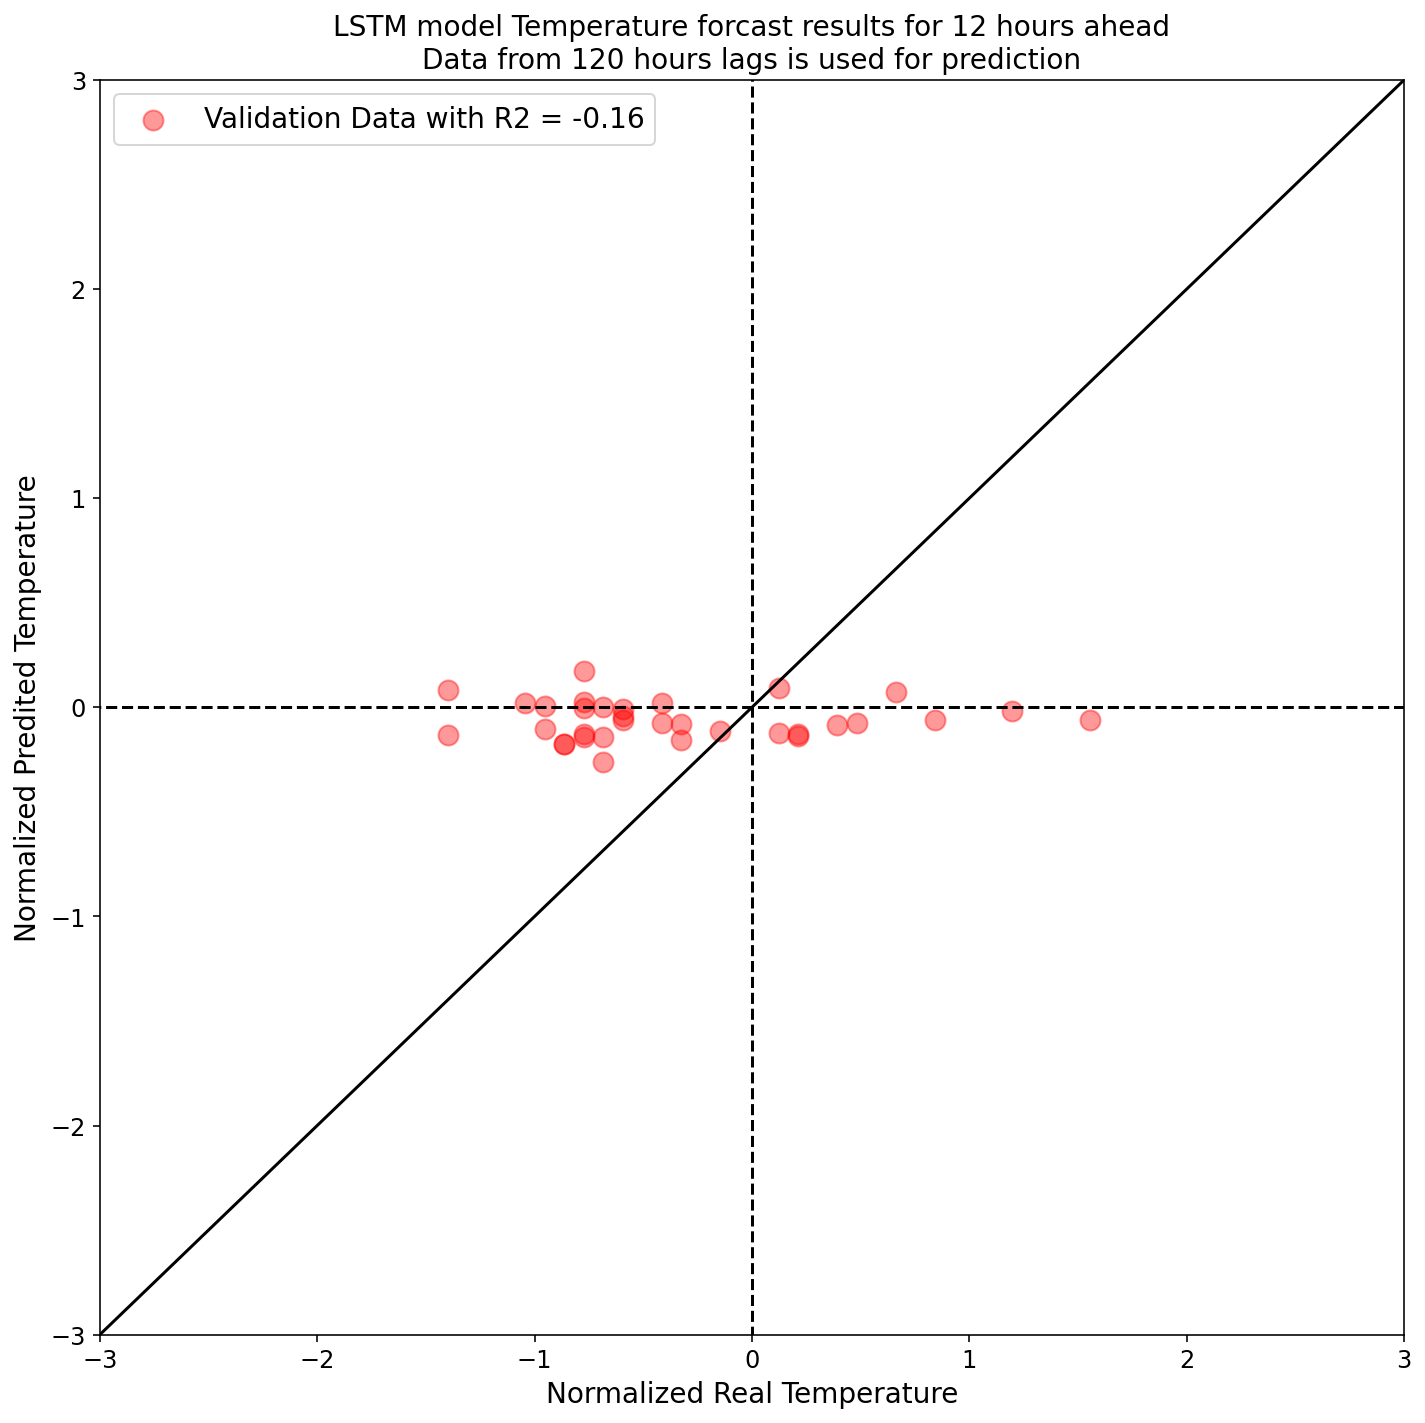

In [137]:
plt.figure(figsize=(10,10))

plt.scatter(real_values, predited_values, color='r', 
            alpha=0.4, label=f'Validation Data with R2 = {rs2}',s=100)
plt.xlabel("Normalized Real Temperature", fontsize=14)
plt.ylabel("Normalized Predited Temperature", fontsize=14)
plt.xticks(fontsize=12), plt.yticks(fontsize=12)
plt.axline([0, 0], [1, 1], color ='k')
plt.hlines(0, -4, 4, linestyles="--", color ='k')
plt.vlines(0, -4, 4, linestyles="--", color ='k')

plt.xlim(-3,3), plt.ylim(-3,3)

plt.title("LSTM model Temperature forcast results for 12 \
hours ahead\nData from 120 hours lags is used for prediction", fontsize=14)

plt.tight_layout()
plt.legend(fontsize=14)

# plt.savefig("../Figures/" + section_fig_main_title + "LSTM12HoursAhead.png")